# Variance illustrations

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.linalg as la
import seaborn as sns 
sns.set_theme();

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "font.sans-serif": ["Times"]})

Let's try to illustrate the covariance matrix of the random effects model: 
\begin{align}
\boldsymbol{\Omega}\equiv\text{E}(\mathbf{u}_{i}\mathbf{u}_{i}'|\mathbf{x}_{i})=\begin{pmatrix}\sigma_{c}^{2}+\sigma_{u}^{2} & \cdots & \sigma_{c}^{2}\\
\vdots & \ddots & \vdots\\
\sigma_{c}^{2} & \cdots & \sigma_{c}^{2}+\sigma_{u}^{2}
\end{pmatrix}=\sigma_{c}^{2}\mathbf{1}_{T}\mathbf{1}_{T}'+\sigma_{u}^{2}\mathbf{I}_{T\times T}
\end{align}

In [2]:
N = 10
T = 10

sigma_c = 2.0
sigma_u = 1.0
K = 3 
beta = np.array([[1.,1.,1.]]).T # row vector 

In [3]:
s = f'({sigma_c:3.1f},{sigma_u:3.1f})'

In [4]:
euu = np.eye(T)
def plot_omega(sigma_c, sigma_u, savename=None, title=None, cbar=True, euu=euu):
    '''
        Ex savename='theoretical_cov_re.pdf'
    '''
    omega = sigma_c * np.ones((T,T)) + sigma_u * euu # np.eye(T)

    ax = sns.heatmap(la.block_diag(*[omega for i in range(N)]), cmap = 'YlGnBu', cbar=cbar);
    ticks   = [T/2 + i*T for i in range (N)]
    ticklab = [f'{i+1}' for i in range(N)]
    ax.set_xticks(ticks);
    ax.set_xticklabels(ticklab);
    ax.set_xlabel('Individual $i$');
    ax.set_yticks(ticks);
    ax.set_yticklabels(ticklab);
    ax.set_ylabel('Individual $j$');
    if title != None: 
        titel = f'Cov$(v_{{it}}, v_{{js}})$ with std$(u) = {sigma_u:3.1f}$ and std$(c) = {sigma_c:3.1f}$'
    if title != '': 
        ax.set_title(title);
    if savename != None: 
        plt.savefig(savename);

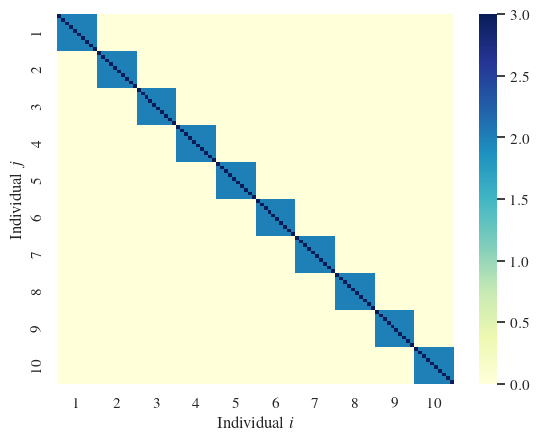

In [5]:
plot_omega(sigma_c=2., sigma_u=1., savename='theoretical_cov_re.pdf', cbar=True)

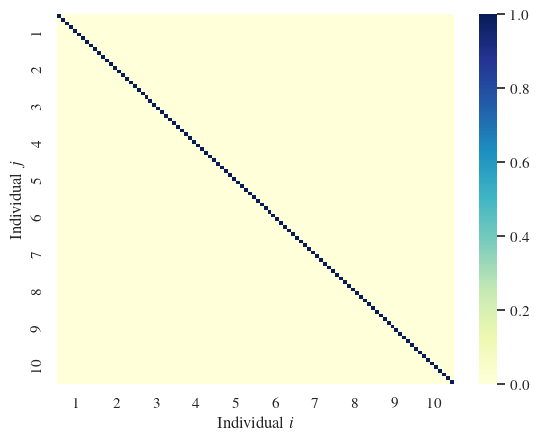

In [6]:
plot_omega(sigma_c=0., sigma_u=1., savename='theoretical_cov_iid.pdf')

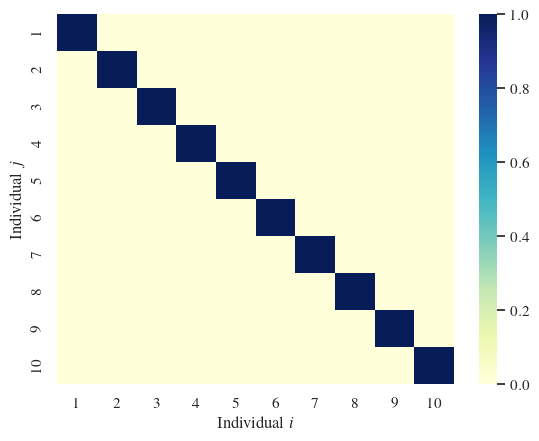

In [7]:
plot_omega(sigma_c=1., sigma_u=0., savename='theoretical_cov_fe.pdf', title='')

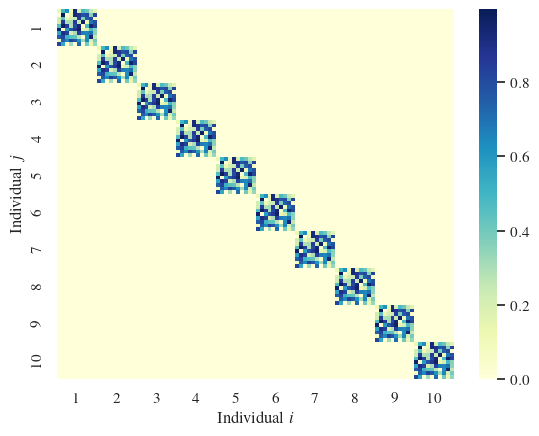

In [8]:
euu = np.random.uniform(0,1,(T,T))
plot_omega(sigma_c=0., sigma_u=1., savename='theoretical_cov_fe_robust.pdf', title='', euu=euu)

# Simulate data

In [9]:
X = np.hstack([np.ones((N*T,1)), np.random.normal(0,1,(N*T,K-1))])
u = np.random.normal(0,sigma_u,(N*T,1))
c = np.random.normal(0,sigma_c,(N,1))
ii_repeat = [i for i in range(N) for t in range(T)]
c = c[ii_repeat]

y = X@beta + c + u

# induce correlation between c and x 
#c = c + X[:, 1]
#c = c - c.mean() # make mean-zero again 

In [10]:
betahat = np.linalg.inv(X.T @ X) @ X.T @ y

print(f'Estimate: ')
for k in range(K):
    print(f'{k}: {betahat[k,0]}')

Estimate: 
0: 0.09497175954582565
1: 0.9650260283762804
2: 0.991413900387574


This is clearly not anywhere near the true covariancematrix of the composite error terms.


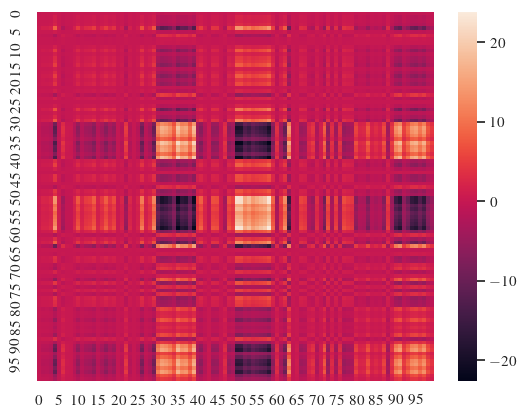

In [11]:
vhat = y - X@betahat
sns.heatmap(vhat @ vhat.T);